In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.metrics import accuracy_score,confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# data = 'heart.csv'
# df = pd.read_csv(data)

from google.colab import drive
drive.mount('/content/drive')

df = pd.read_csv("/content/drive/My Drive/Colab Notebooks/Intellipaat/Weekend_ML_Batch/Decision_Trees/heart-1.csv")
df.head()

Mounted at /content/drive


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [7]:
df.head(10)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
5,57,1,0,140,192,0,1,148,0,0.4,1,0,1,1
6,56,0,1,140,294,0,0,153,0,1.3,1,0,2,1
7,44,1,1,120,263,0,1,173,0,0.0,2,0,3,1
8,52,1,2,172,199,1,1,162,0,0.5,2,0,3,1
9,57,1,2,150,168,0,1,174,0,1.6,2,0,2,1


In [8]:
# from sklearn.metrics.pairwise import normalize
df.target.value_counts(normalize = True)*100

1    54.455446
0    45.544554
Name: target, dtype: float64

In [9]:
df.shape

(303, 14)

In [10]:
df.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [11]:
df.dtypes

age           int64
sex           int64
cp            int64
trestbps      int64
chol          int64
fbs           int64
restecg       int64
thalach       int64
exang         int64
oldpeak     float64
slope         int64
ca            int64
thal          int64
target        int64
dtype: object

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


Text(0.5, 0, 'Age')

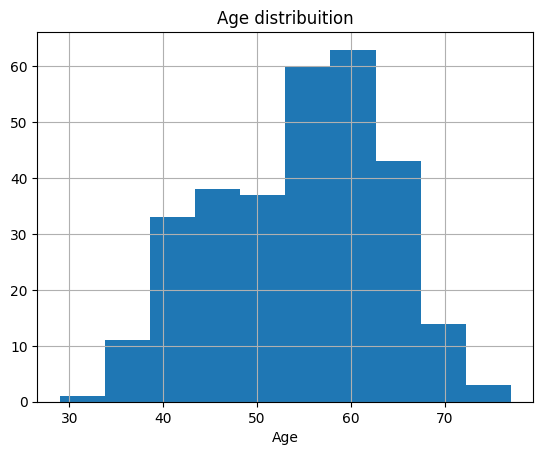

In [15]:
df['age'].hist(grid=True, bins=10);
plt.title('Age distribuition')
plt.xlabel('Age')

In the above graph, we can analyse the distribution of Age column, and we can say that there are 60+ people who are having age between 57 to 63.

<ipython-input-17-3cff343805c6>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[df['sex']==1]['age'],  label='Male')
<ipython-input-17-3cff343805c6>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[df['sex']==0]['age'], label='Female')


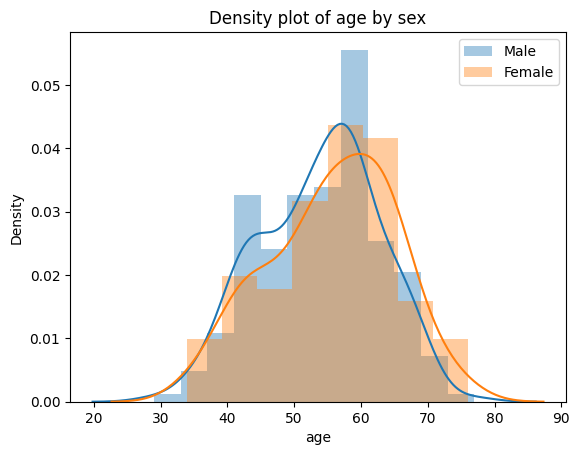

In [17]:
sns.distplot(df[df['sex']==1]['age'],  label='Male')
sns.distplot(df[df['sex']==0]['age'], label='Female')
plt.legend()
plt.title('Density plot of age by sex')
plt.show()

<ipython-input-18-d94d33d398b2>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[df['target']==1]['age'],  label='heart attack yes',kde=True)
<ipython-input-18-d94d33d398b2>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[df['target']==0]['age'], label='healthy',kde=True)


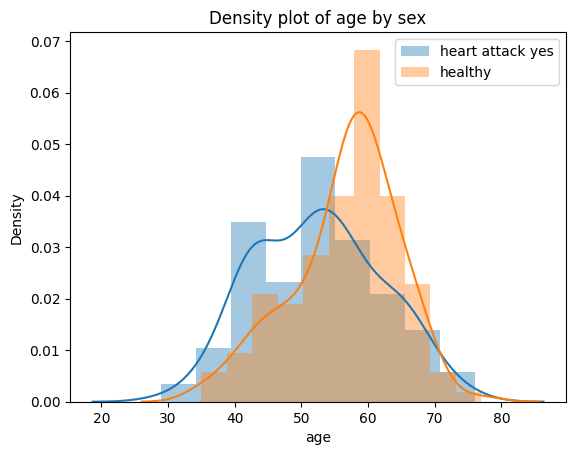

In [18]:
sns.distplot(df[df['target']==1]['age'],  label='heart attack yes',kde=True)
sns.distplot(df[df['target']==0]['age'], label='healthy',kde=True)
plt.legend()
plt.title('Density plot of age by sex')
plt.show()

Density graph shows the smoothed distribution of points along the numerical axis. The density peaks where there is the highest concentration of points. In sum, density graphs can be considered smoothed histograms.

Text(0.5, 1.0, 'Resting Blood pressure distribuition')

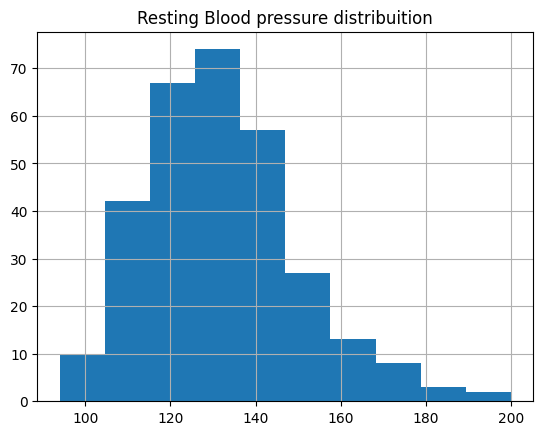

In [19]:
df['trestbps'].hist()
plt.title('Resting Blood pressure distribuition')

<ipython-input-20-2bf5d2b4f9a1>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['trestbps'], bins=10,kde=False)


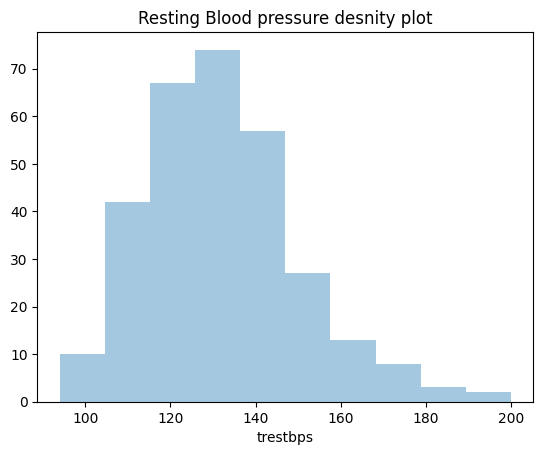

In [20]:
sns.distplot(df['trestbps'], bins=10,kde=False)
plt.title('Resting Blood pressure desnity plot');

In the above grapgh, we are having a normal distribution

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1599: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1599: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))


<Axes: xlabel='oldpeak'>

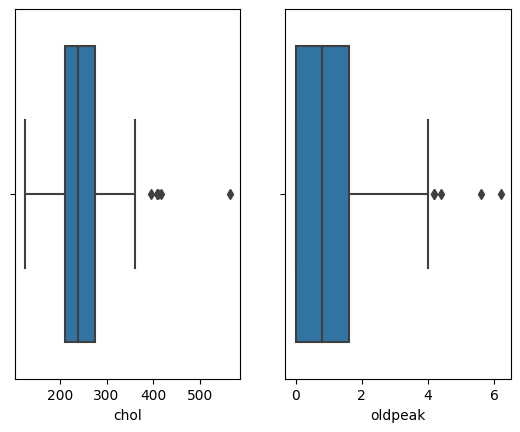

In [21]:
fig, axes = plt.subplots(nrows = 1, ncols=2)
sns.boxplot(x='chol', data=df, orient='v', ax=axes[0])
sns.boxplot(x='oldpeak', data=df,  orient='v', ax=axes[1])

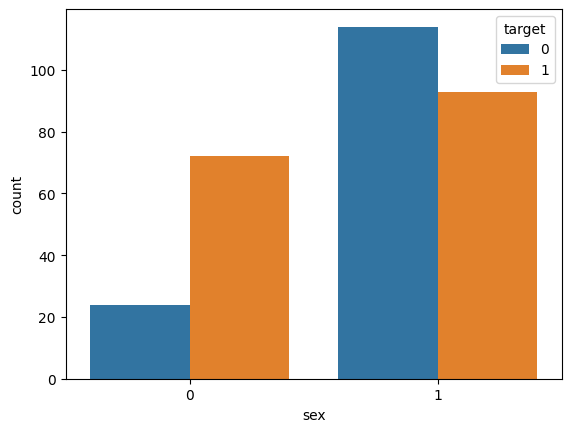

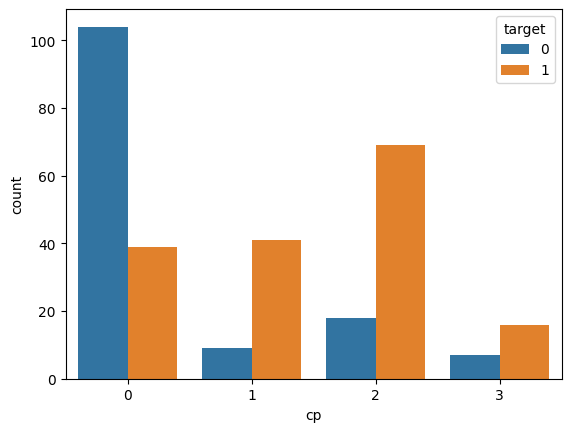

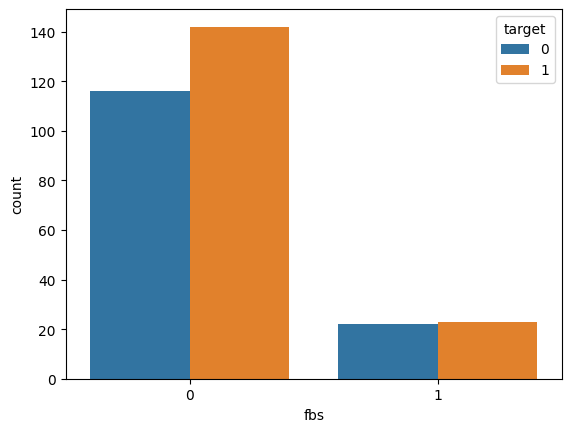

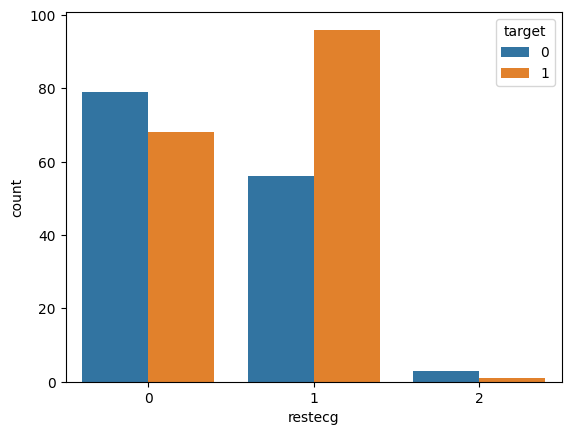

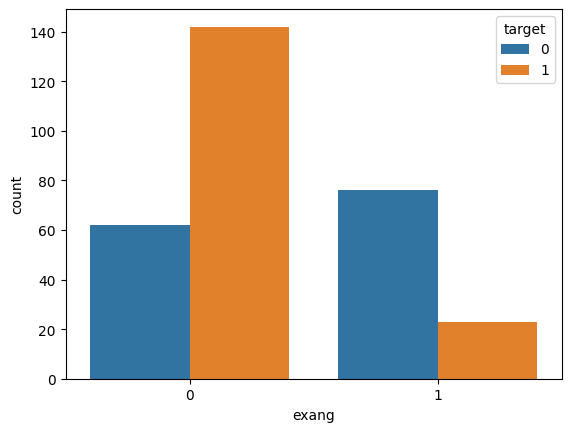

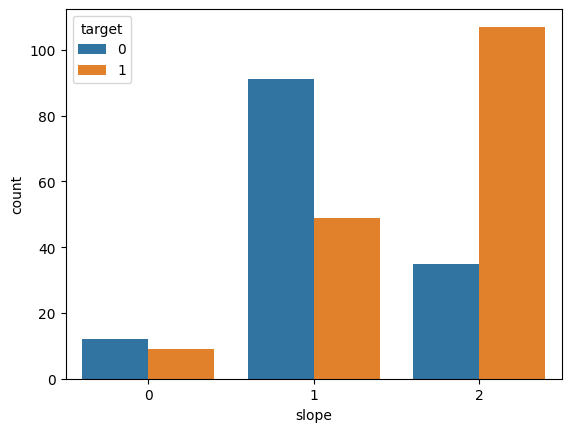

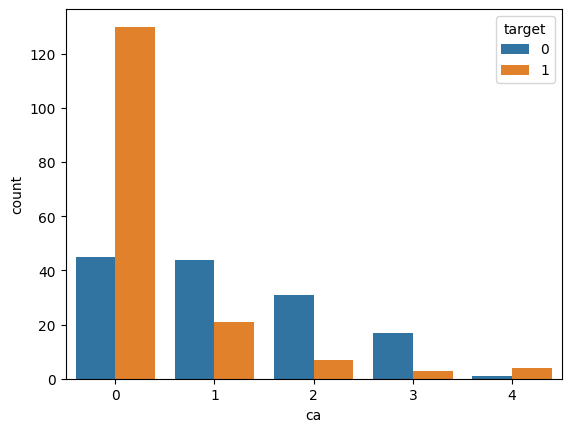

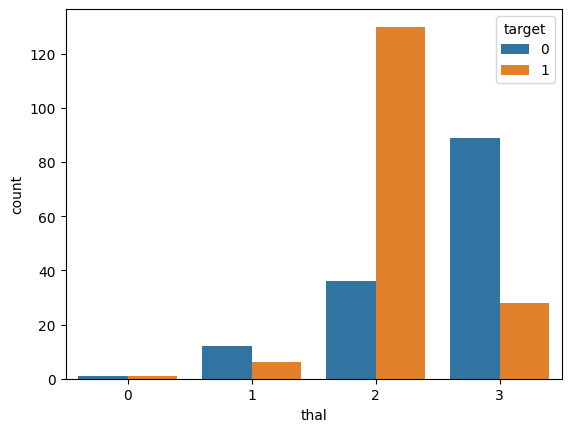

In [22]:
cat_feat = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal']

for list_var in cat_feat:
  sns.countplot(x=list_var, hue='target', data=df)
  plt.show()


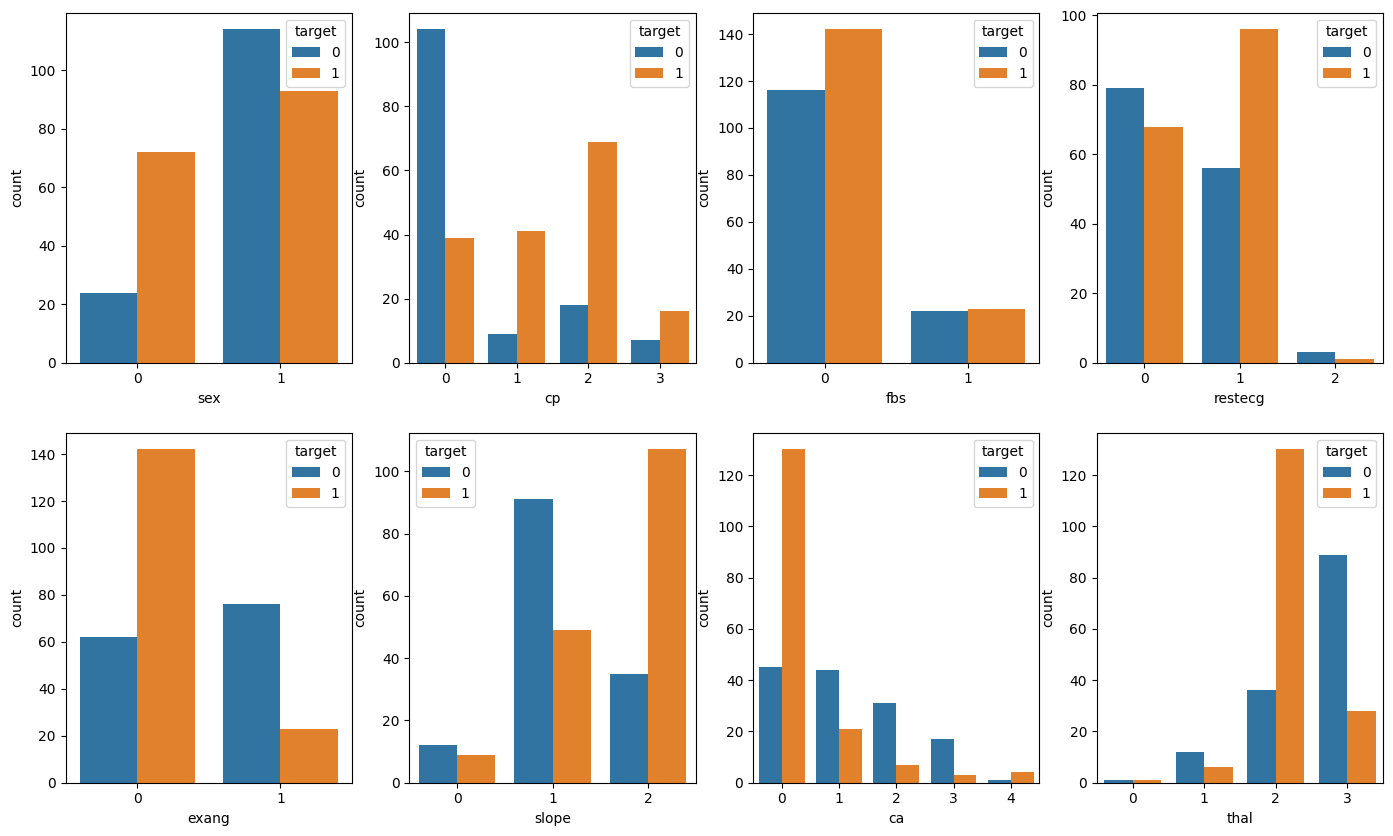

In [23]:
fig, axes = plt.subplots(nrows=2, ncols=4, figsize=(17,10))
cat_feat = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal', 'target']

for idx, feature in enumerate(cat_feat):
    if feature != 'target':
        ax = axes[int(idx/4), idx%4]
        # ax = axes[1,2]
        sns.countplot(x=feature, hue='target', data=df,ax=ax)

Let's get some insights frm this chart:

Chest pain: the heart desease diagnosis is greater among the patients that feel any chest pain.

Restegc - Eletrocardiagraph results: the rate of heart desease diagnoses higher for patients with a ST-T wabe abnormality .

Slope: The ratio of patients diagnosed with heart desease is higher for slope = 2

Ca: The diagonosed ratio decreases fo ca between 1 and 3.

Thal: the diagnosed ratio is higher for thal = 2.

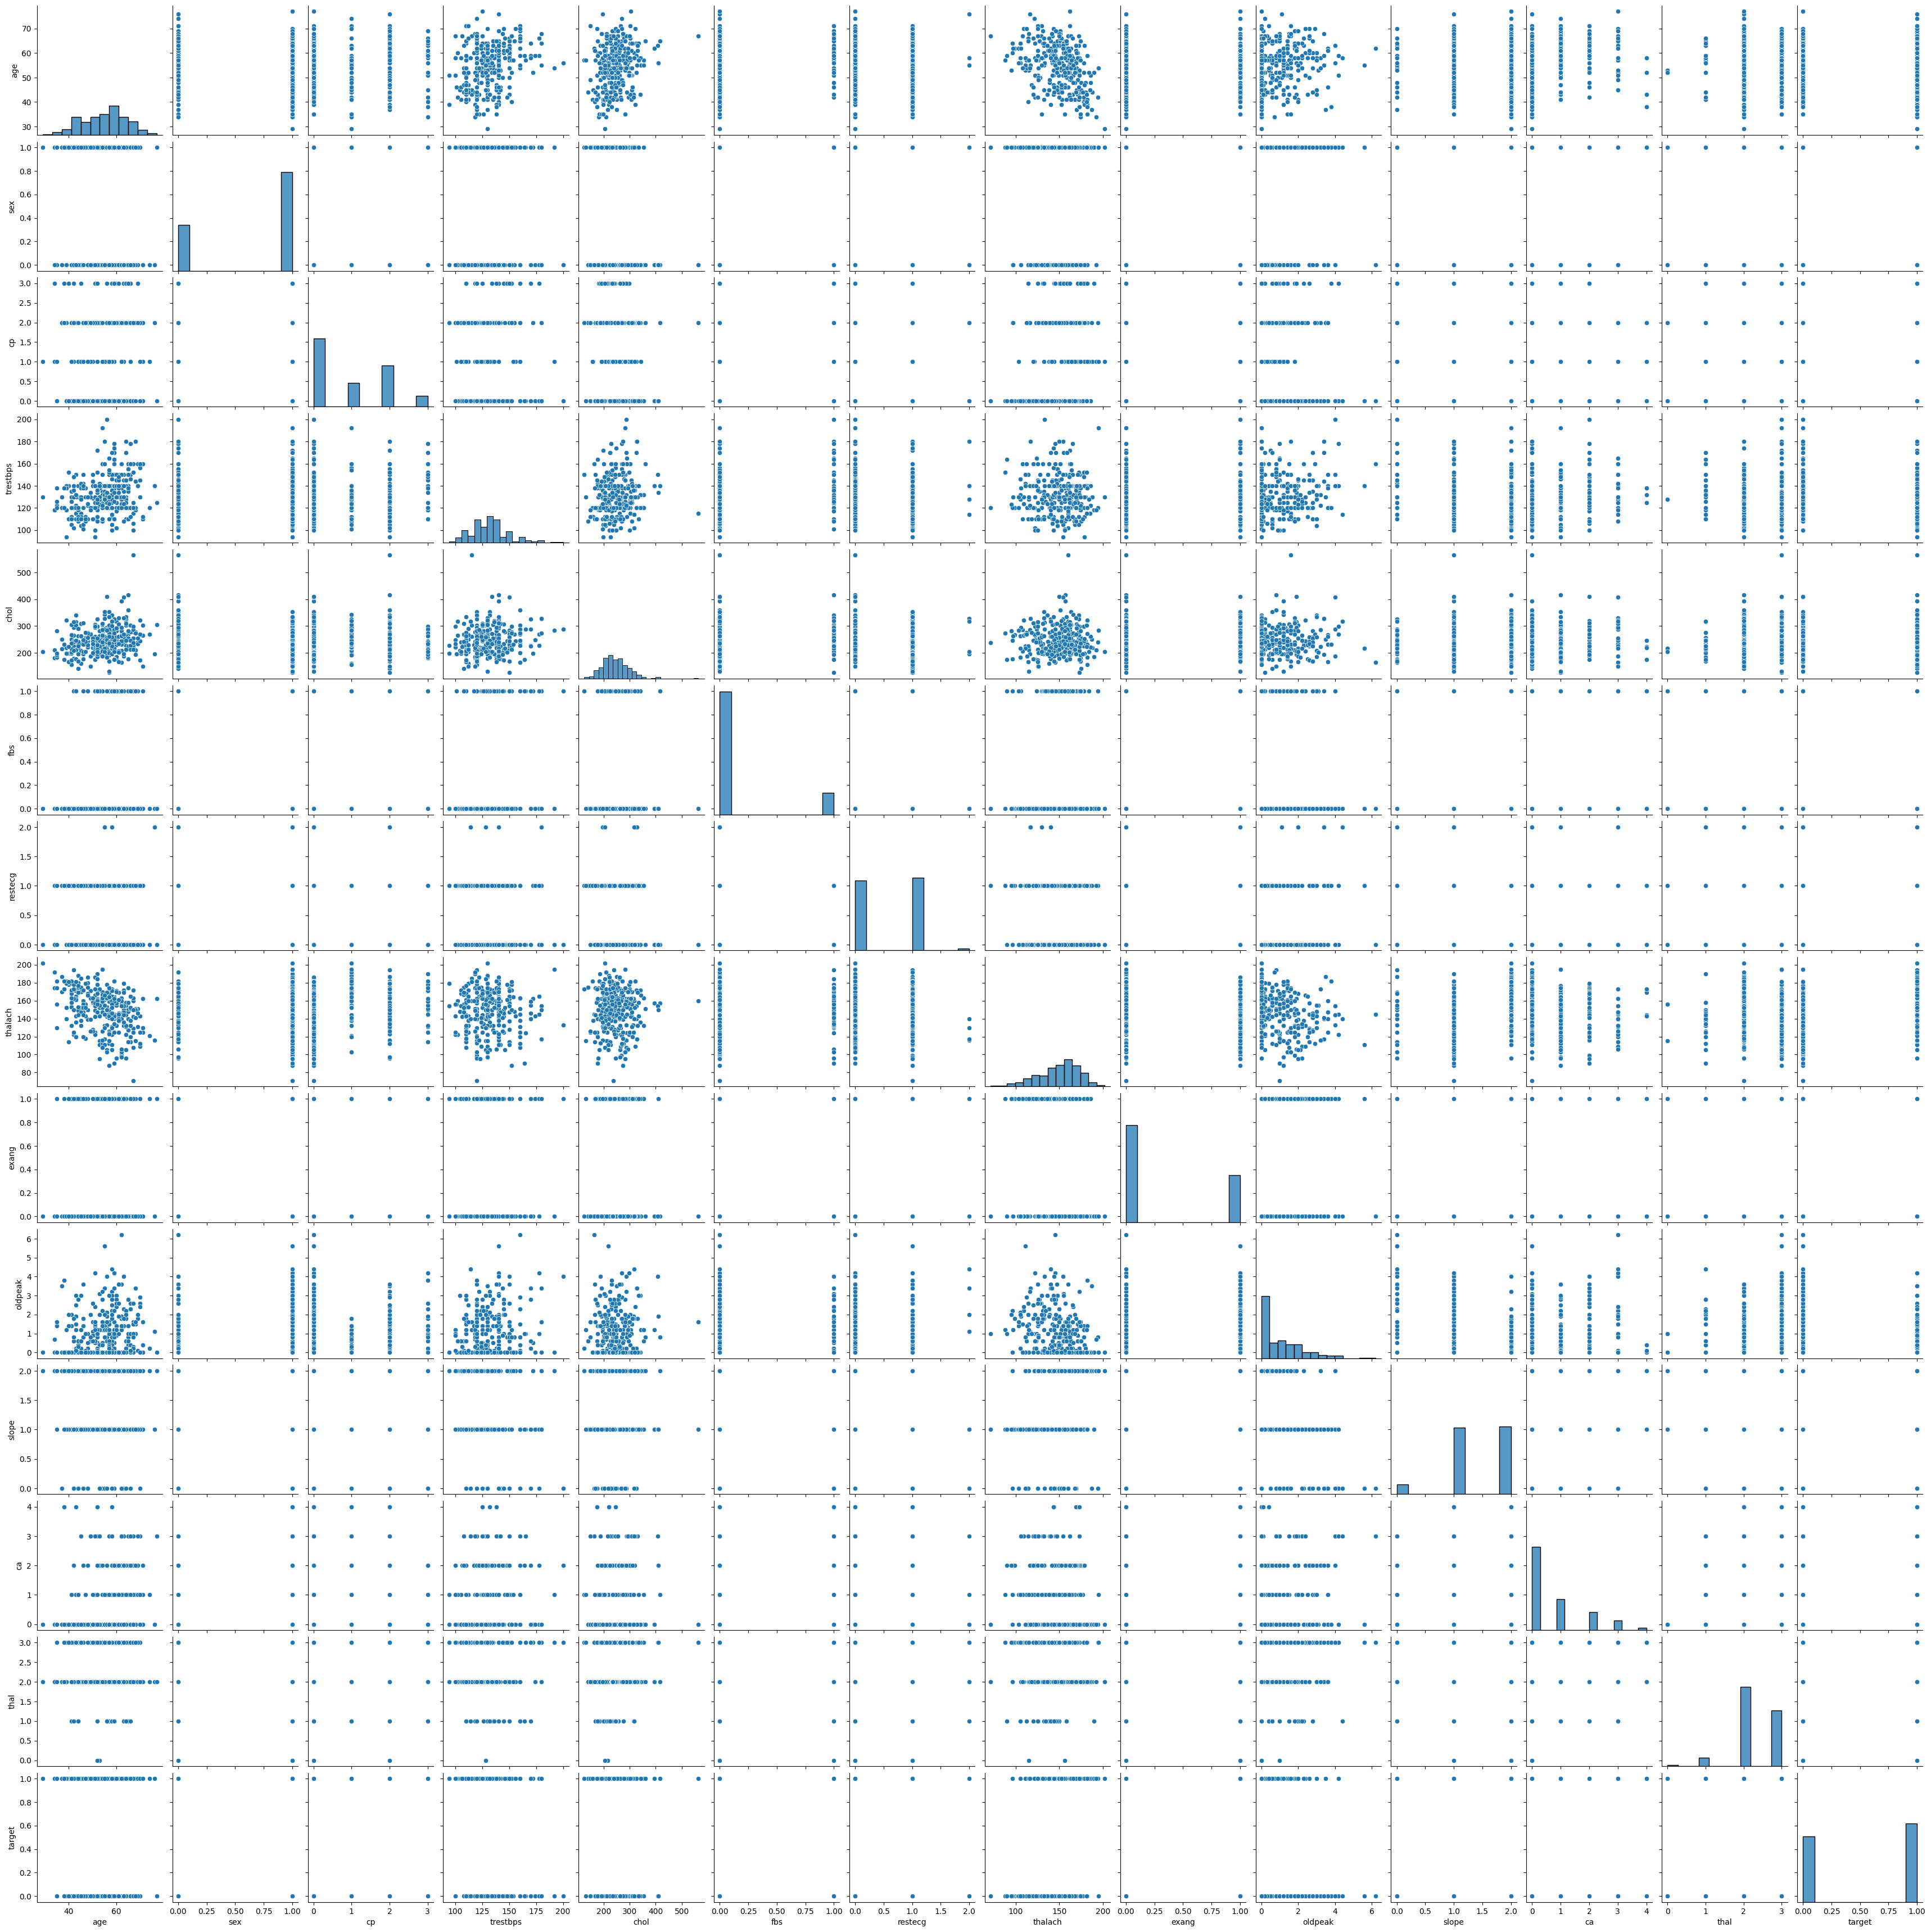

In [24]:
sns.pairplot(df)


Text(0.5, 1.0, 'Count of target feature by sex')

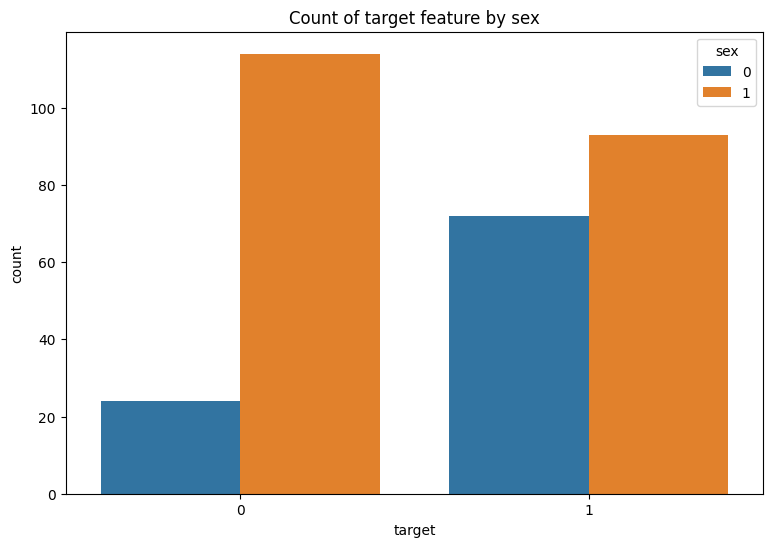

In [25]:
plt.rcParams['figure.figsize'] = (9,6)
sns.countplot(x='target', hue='sex', data=df);
plt.title('Count of target feature by sex')

The amount of healthy male people is greater than the amount of unhealthy. For women, the number of unhealthy women is higher.

In [26]:
df.corr()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,0.068001,-0.225439
sex,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.118261,0.210041,-0.280937
cp,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.161736,0.433798
trestbps,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.062210,-0.144931
chol,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.098803,-0.085239
fbs,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.137979,-0.032019,-0.028046
restecg,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.072042,-0.011981,0.137230
thalach,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.213177,-0.096439,0.421741
exang,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.115739,0.206754,-0.436757
oldpeak,0.210013,0.096093,-0.149230,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.577537,0.222682,0.210244,-0.430696


<Axes: >

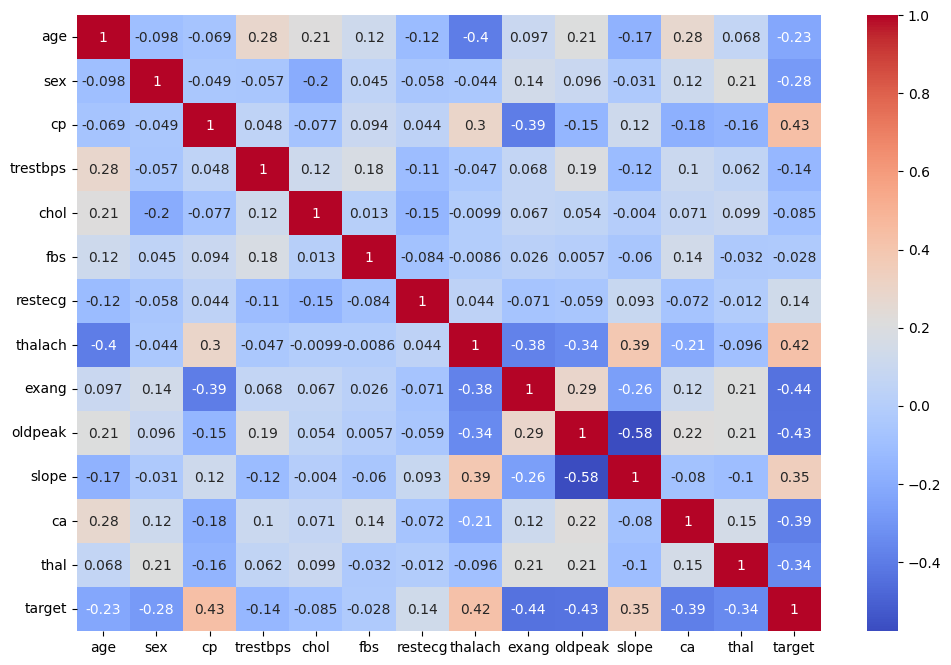

In [27]:
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')

Apparently there are no features with a pretty strong correlation (above |0.7|)

Text(0.5, 1.0, ' Colestrol vs Blood Pressure in rest')

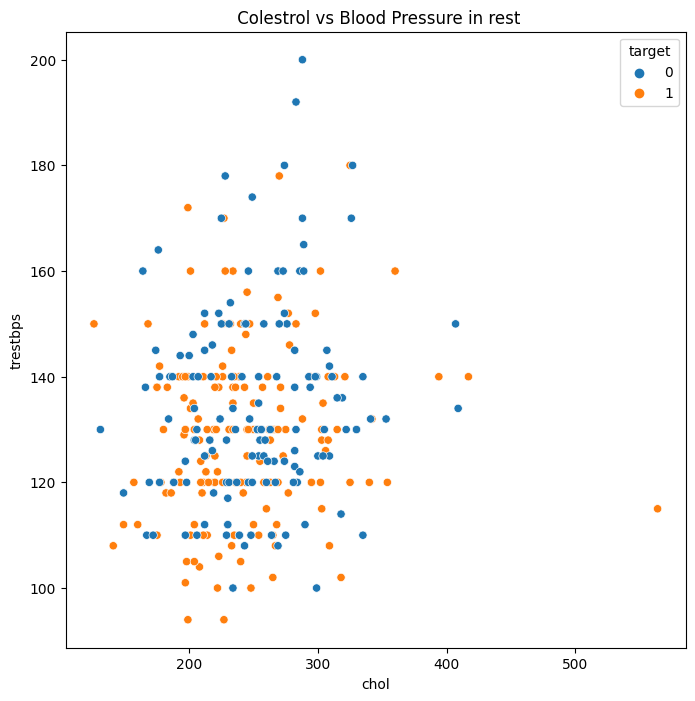

In [28]:
plt.rcParams['figure.figsize'] = (8,8)
sns.scatterplot(x='chol', y='trestbps', hue='target', size=None, data=df)
plt.title(' Colestrol vs Blood Pressure in rest')

Text(0.5, 1.0, ' CP vs Thalach in rest')

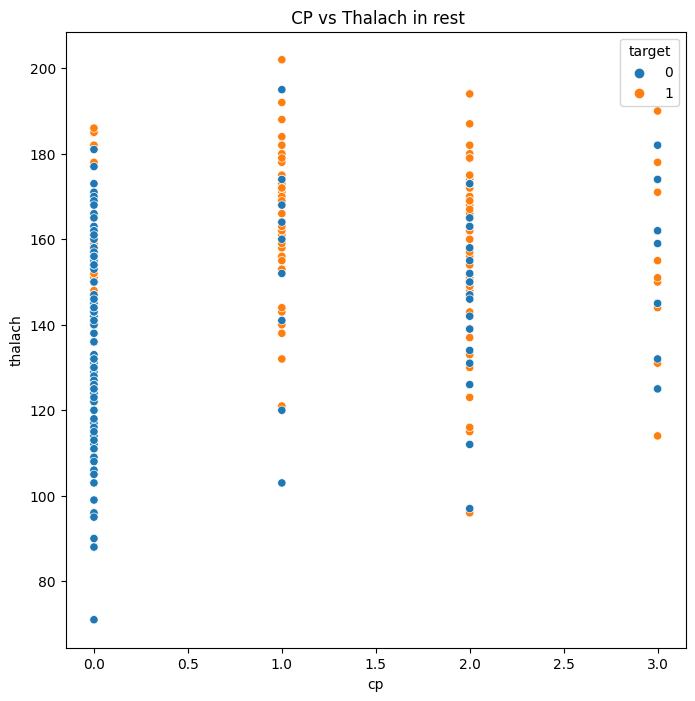

In [ ]:
plt.rcParams['figure.figsize'] = (8,8)
sns.scatterplot(x='cp', y='thalach', hue='target', size=None, data=df)
plt.title(' CP vs Thalach in rest')

As can be seen there is a paitient with high cholesterol. But, there's not a specific division between those that feel pain during exercise practice and those of not feel pain. We can use hue to filter by sex. It's also possible to filter using size = 'label_to_filer'.

In [ ]:
X = df.drop(columns=['target'])#independent variable
y = df['target']#dependent or target value
print(X.shape)
print(y.shape)

(303, 13)
(303,)


In [ ]:
x_train,x_test,y_train,y_test = train_test_split(X,y,random_state=0, test_size=0.3)
print(x_train.shape)
print(x_test.shape)

(212, 13)
(91, 13)


In [ ]:
clf = tree.DecisionTreeClassifier()

clf.fit(x_train,y_train)

y_train_pred = clf.predict(x_train)

y_test_pred = clf.predict(x_test)

In [ ]:
len(y_train_pred)

212

In [ ]:
len(y_test_pred)

91

In [ ]:
a=100
print('The value of a is', a,' and that is it')

The value of a is 100  and that is it


In [ ]:
print(f'The value of a is {a} and that is it')

The value of a is 100 and that is it


In [ ]:
# helper function
def plot_confusionmatrix(y_train_pred,y_train,dom):
    print(f'{dom} Confusion matrix')
    cf = confusion_matrix(y_train_pred,y_train)
    sns.heatmap(cf,annot=True,cmap='Blues')#For g and G , the maximum number of significant digits
    plt.tight_layout()
    plt.show()

In [ ]:
print(f'Train score {accuracy_score(y_train_pred,y_train)}')
print(f'Test score {accuracy_score(y_test_pred,y_test)}')


Train score 1.0
Test score 0.7252747252747253


Train Data Confusion matrix


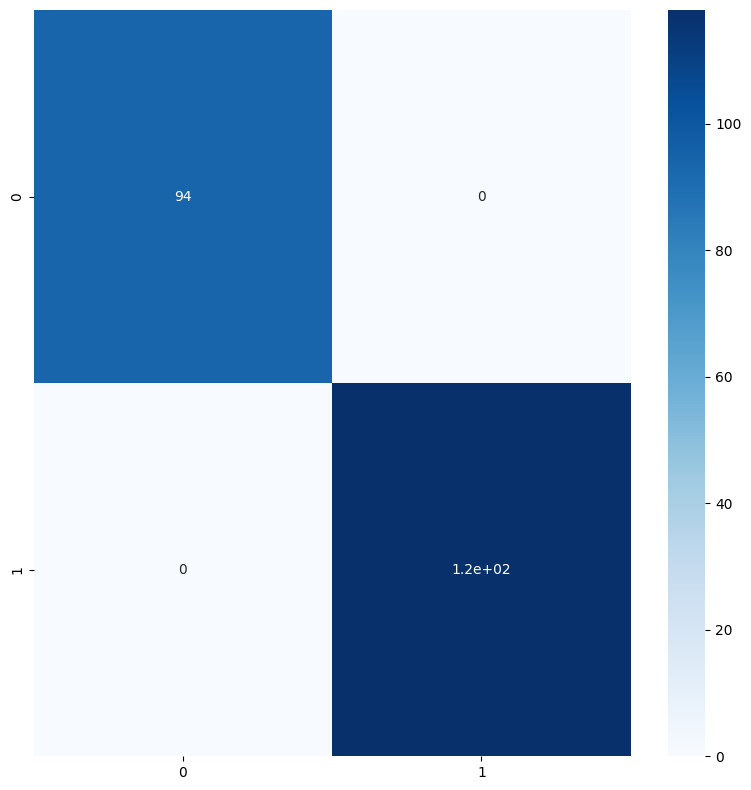

In [ ]:
plot_confusionmatrix(y_train_pred,y_train,dom='Train Data')

Test Data Confusion matrix


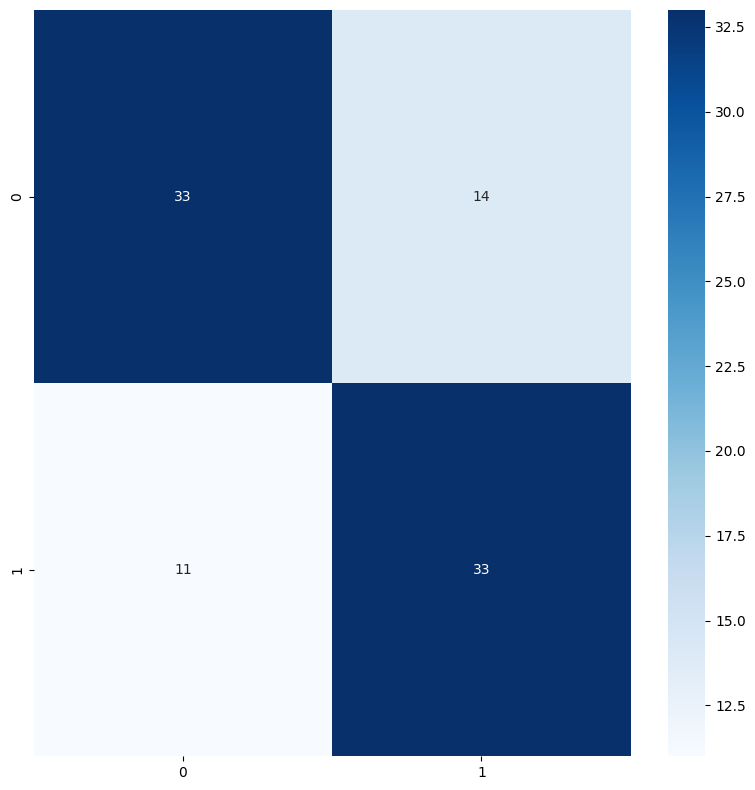

In [ ]:

plot_confusionmatrix(y_test_pred,y_test,dom='Test Data')

In [ ]:
67/91

0.7362637362637363

In [ ]:
#               Actual Values
#predicted       1   0
#             1  TP  FP
#             0  FN  TN

In [ ]:
c_parameter_name = 'max_depth'
c_parameter_values = [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,20,50,75,100,150]
df = pd.DataFrame(columns=[c_parameter_name, 'train_accuracy','test_accuracy'])

for input_parameter in c_parameter_values:
    model = tree.DecisionTreeClassifier(max_depth=input_parameter,splitter='best')
    y_pred_train = model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    acc_score = accuracy_score(y_test,y_pred)*100
    acc_score_train = accuracy_score(y_train,model.predict(x_train))*100
    # acc_score_train = accuracy_score(y_train,y_pred_train)*100
    df = df.append({c_parameter_name : input_parameter , 'train_accuracy' : acc_score_train, 'test_accuracy' : acc_score}, ignore_index=True)
print(df)
print("")

<ipython-input-35-5bc2099c7141>:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({c_parameter_name : input_parameter , 'train_accuracy' : acc_score_train, 'test_accuracy' : acc_score}, ignore_index=True)
<ipython-input-35-5bc2099c7141>:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({c_parameter_name : input_parameter , 'train_accuracy' : acc_score_train, 'test_accuracy' : acc_score}, ignore_index=True)
<ipython-input-35-5bc2099c7141>:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({c_parameter_name : input_parameter , 'train_accuracy' : acc_score_train, 'test_accuracy' : acc_score}, ignore_index=True)
<ipython-input-35-5bc2099c7141>:12: FutureWarning: The frame.append metho

    max_depth  train_accuracy  test_accuracy
0         1.0       75.471698      76.923077
1         2.0       80.188679      73.626374
2         3.0       86.792453      81.318681
3         4.0       86.792453      76.923077
4         5.0       94.339623      74.725275
5         6.0       97.169811      71.428571
6         7.0       98.584906      72.527473
7         8.0       99.528302      71.428571
8         9.0      100.000000      75.824176
9        10.0      100.000000      75.824176
10       11.0      100.000000      74.725275
11       12.0      100.000000      71.428571
12       13.0      100.000000      71.428571
13       14.0      100.000000      72.527473
14       15.0      100.000000      71.428571
15       20.0      100.000000      72.527473
16       50.0      100.000000      72.527473
17       75.0      100.000000      74.725275
18      100.0      100.000000      74.725275
19      150.0      100.000000      75.824176



<ipython-input-35-5bc2099c7141>:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({c_parameter_name : input_parameter , 'train_accuracy' : acc_score_train, 'test_accuracy' : acc_score}, ignore_index=True)
<ipython-input-35-5bc2099c7141>:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({c_parameter_name : input_parameter , 'train_accuracy' : acc_score_train, 'test_accuracy' : acc_score}, ignore_index=True)
<ipython-input-35-5bc2099c7141>:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({c_parameter_name : input_parameter , 'train_accuracy' : acc_score_train, 'test_accuracy' : acc_score}, ignore_index=True)
<ipython-input-35-5bc2099c7141>:12: FutureWarning: The frame.append metho

In [ ]:
clf = tree.DecisionTreeClassifier(max_depth=3,splitter='best')
clf.fit(x_train,y_train)
y_train_pred = clf.predict(x_train)
y_test_pred = clf.predict(x_test)

In [ ]:
accuracy_score(y_test,y_test_pred)*100

81.31868131868131

In [ ]:
accuracy_score(y_train,y_train_pred)*100

86.79245283018868

Test Confusion matrix


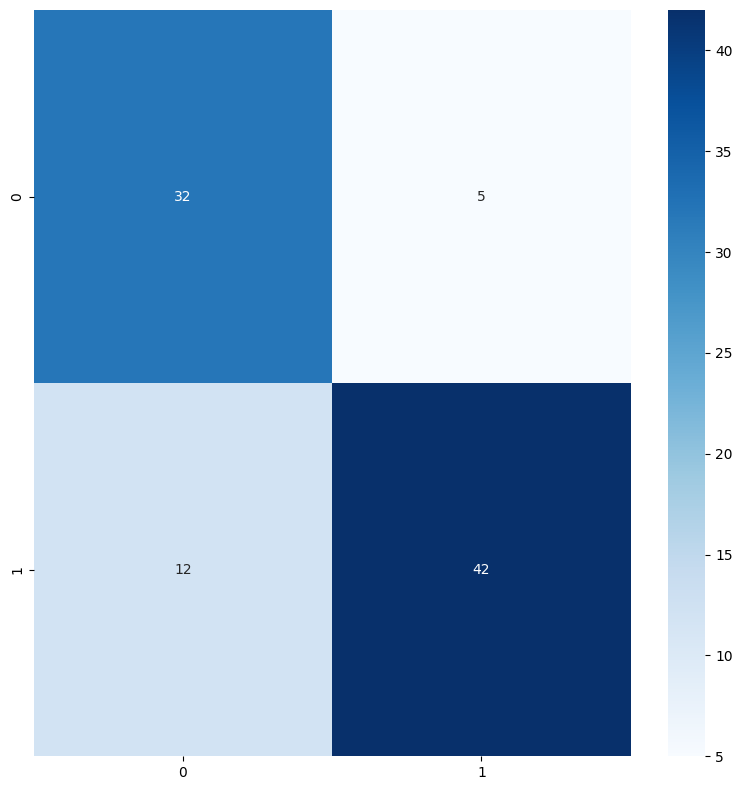

In [ ]:

plot_confusionmatrix(y_test_pred,y_test,dom='Test')

In [ ]:
from sklearn.metrics import classification_report

In [ ]:
print(classification_report(y_test_pred,y_test))

              precision    recall  f1-score   support

           0       0.73      0.86      0.79        37
           1       0.89      0.78      0.83        54

    accuracy                           0.81        91
   macro avg       0.81      0.82      0.81        91
weighted avg       0.83      0.81      0.81        91



In [ ]:
#recall->tp / (tp + fn)
#The recall is the measure of our model correctly identifying True Positives.
#Thus, for all the customers who actually have heart disease, recall tells us how many we correctly identified as a heart patient.

#precision of class 0 = TP of class 0/total number of object
#What is the Precision for our model? Yes, it is 0.843 or, when it predicts that a patient has heart disease, it is correct around 84% of the time.
#precision of class 1 = TP of class 1/total number of object

#macro average = (precision of class 0 + precision of class 1)/2

#weighted average is precision of all classes merge together
#weighted average = (TP of class 0 + TP of class 1)/(total number of class 0 + total number of class 1)

#F1-score is a measure of a model's accuracy on a dataset
#a good F1 score means that you have low false positives and low false negatives,
#Accuracy is used when the True Positives and True negatives are more important while
#F1-score is used when the False Negatives and False Positives are crucial.
#Support is the number of actual occurrences of the class in the specified dataset.

In [ ]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(random_state = 45,max_depth=3,n_estimators=100)

rf.fit(x_train,y_train)
y_train_pred = rf.predict(x_train)
y_test_pred = rf.predict(x_test)

In [ ]:
accuracy_score(y_test,y_test_pred)*100

80.21978021978022

In [ ]:
accuracy_score(y_train,y_train_pred)*100

89.15094339622641

Test Confusion matrix


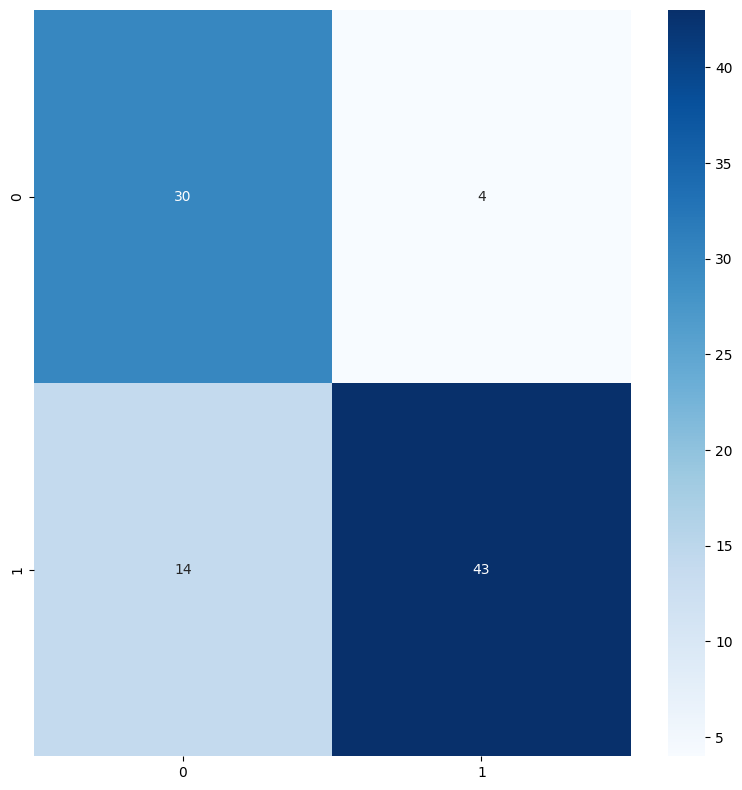

In [ ]:

plot_confusionmatrix(y_test_pred,y_test,dom='Test')